In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st

t_true = np.arange(0,365,0.1)

import parse

[told,xold_mean,xold_var] =  parse.parseXML('Model4SS-state-estimation0.xml')

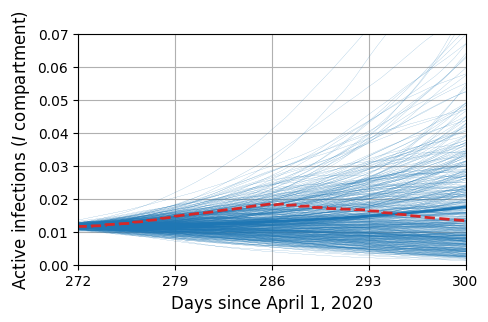

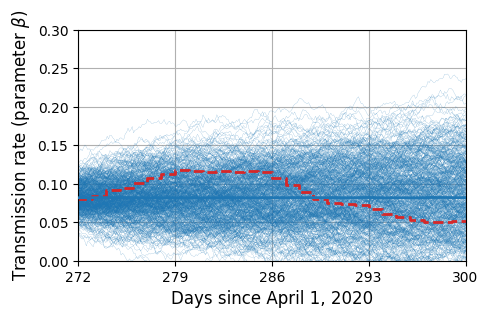

In [2]:
skip = 10

Ndays = 30
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(0,Ndays,tgrd) # Define time axis

gamma = 1/14
Nsamp = 500*skip

i, b = np.zeros((Nsamp,tgrd)), np.zeros((Nsamp,tgrd))
Yforecast = np.zeros((4,tgrd))

samp = np.random.multivariate_normal(xold_mean[:,2992], np.reshape(xold_var[:,2992],[4,4]), size=Nsamp)

np.random.seed(123)
for ii in range(Nsamp):
  Yforecast[:,0] = samp[ii]
  for kk in range(1,tgrd):
    Yforecast[0,kk] = Yforecast[0,kk-1] + dt*(-Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1])
    Yforecast[1,kk] = Yforecast[1,kk-1] + dt*(Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] - gamma*Yforecast[1,kk-1])
    Yforecast[2,kk] = Yforecast[2,kk-1] + dt*(gamma*Yforecast[1,kk-1])
    Yforecast[3,kk] = Yforecast[3,kk-1] + 8.74662076303546e-03*np.sqrt(dt)*np.random.normal(0,1)

  i[ii,:] = Yforecast[1,:]
  b[ii,:] = Yforecast[3,:]

mean_i = np.mean(i,axis=0)
mean_b = np.mean(b,axis=0)


Igrd = np.linspace(0,0.07,201)
Ipdf_0 = st.gaussian_kde(i[:,0],bw_method = 0.2)
Ipdf_7 = st.gaussian_kde(i[:,70],bw_method = 0.2)
Ipdf_14 = st.gaussian_kde(i[:,140],bw_method = 0.2)
Ipdf_21 = st.gaussian_kde(i[:,210],bw_method = 0.2)
Ipdf_28 = st.gaussian_kde(i[:,280],bw_method = 0.2)
Imax = np.max([Ipdf_0(Igrd),Ipdf_7(Igrd),Ipdf_14(Igrd),Ipdf_21(Igrd),Ipdf_28(Igrd)])

Bgrd = np.linspace(0,0.3,201)
Bpdf_0 = st.gaussian_kde(b[:,0],bw_method = 0.2)
Bpdf_7 = st.gaussian_kde(b[:,70],bw_method = 0.2)
Bpdf_14 = st.gaussian_kde(b[:,140],bw_method = 0.2)
Bpdf_21 = st.gaussian_kde(b[:,210],bw_method = 0.2)
Bpdf_28 = st.gaussian_kde(b[:,280],bw_method = 0.2)
Bmax = np.max([Bpdf_0(Bgrd),Bpdf_7(Bgrd),Bpdf_14(Bgrd),Bpdf_21(Bgrd),Ipdf_28(Bgrd)])


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(272+tlist[0,:],i[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(272+tlist[0,:],mean_i,linewidth=2,c='tab:blue',zorder=2)
plt.plot(272+told[2761::]-272,xold_mean[1,2761::],linewidth=2,c='tab:red',linestyle='--',zorder=2)
# plt.plot(272+Ipdf_0(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Ipdf_7(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Ipdf_14(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Ipdf_21(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Ipdf_28(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks([272, 279, 286,293,300])
plt.xlim([272,300])
plt.ylim([0,0.07])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Active infections ($I$ compartment)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('figures/forecast_i_1.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(272+tlist[0,0:370],b[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(272+tlist[0,:],mean_b,linewidth=2,c='tab:blue',zorder=3)
plt.plot(272+told[2761::]-272,xold_mean[3,2761::],linewidth=2,c='tab:red',linestyle='--',zorder=2)
# plt.plot(272+Bpdf_0(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Bpdf_7(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Bpdf_14(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Bpdf_21(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Bpdf_28(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks([272, 279, 286,293,300])
plt.xlim([272,300])
plt.ylim([0,0.3])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('figures/forecast_beta_1.pdf',bbox_inches='tight')


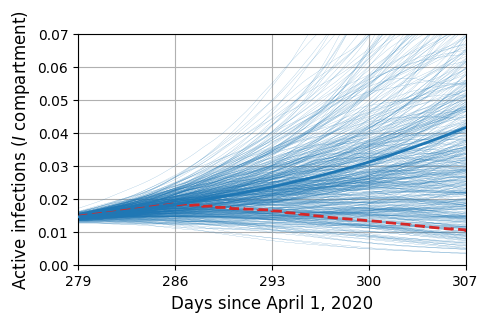

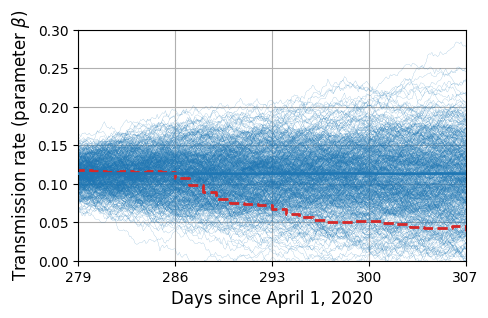

In [3]:
Ndays = 36
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(0,Ndays,tgrd) # Define time axis

gamma = 1/14
Nsamp = 500*skip

i, b = np.zeros((Nsamp,tgrd)), np.zeros((Nsamp,tgrd))
Yforecast = np.zeros((4,tgrd))

samp = np.random.multivariate_normal(xold_mean[:,3069], np.reshape(xold_var[:,3069],[4,4]), size=Nsamp)

np.random.seed(123)
for ii in range(Nsamp):
  Yforecast[:,0] = samp[ii]
  for kk in range(1,tgrd):
    Yforecast[0,kk] = Yforecast[0,kk-1] + dt*(-Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1])
    Yforecast[1,kk] = Yforecast[1,kk-1] + dt*(Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] - gamma*Yforecast[1,kk-1])
    Yforecast[2,kk] = Yforecast[2,kk-1] + dt*(gamma*Yforecast[1,kk-1])
    Yforecast[3,kk] = Yforecast[3,kk-1] + 8.74662076303546e-03*np.sqrt(dt)*np.random.normal(0,1)

  i[ii,:] = Yforecast[1,:]
  b[ii,:] = Yforecast[3,:]

mean_i = np.mean(i,axis=0)
mean_b = np.mean(b,axis=0)

Igrd = np.linspace(0,0.07,201)
Ipdf_0 = st.gaussian_kde(i[:,0],bw_method = 0.2)
Ipdf_7 = st.gaussian_kde(i[:,70],bw_method = 0.2)
Ipdf_14 = st.gaussian_kde(i[:,140],bw_method = 0.2)
Ipdf_21 = st.gaussian_kde(i[:,210],bw_method = 0.2)
Ipdf_28 = st.gaussian_kde(i[:,280],bw_method = 0.2)
Imax = np.max([Ipdf_0(Igrd),Ipdf_7(Igrd),Ipdf_14(Igrd),Ipdf_21(Igrd),Ipdf_28(Igrd)])

Bgrd = np.linspace(0,0.3,201)
Bpdf_0 = st.gaussian_kde(b[:,0],bw_method = 0.2)
Bpdf_7 = st.gaussian_kde(b[:,70],bw_method = 0.2)
Bpdf_14 = st.gaussian_kde(b[:,140],bw_method = 0.2)
Bpdf_21 = st.gaussian_kde(b[:,210],bw_method = 0.2)
Bpdf_28 = st.gaussian_kde(b[:,280],bw_method = 0.2)
Bmax = np.max([Bpdf_0(Bgrd),Bpdf_7(Bgrd),Bpdf_14(Bgrd),Bpdf_21(Bgrd),Ipdf_28(Bgrd)])


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(279+tlist[0,:],i[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(279+tlist[0,:],mean_i,linewidth=2,c='tab:blue',zorder=3)
plt.plot(279+told[3069::]-279,xold_mean[1,3069::],linewidth=2,c='tab:red',linestyle='--',zorder=2)
# plt.plot(279+Ipdf_0(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+7+Ipdf_7(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+14+Ipdf_14(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+21+Ipdf_21(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+28+Ipdf_28(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(279+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks([279,286,293,300,307])
plt.xlim([279,307])
plt.ylim([0,0.07])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Active infections ($I$ compartment)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('figures/forecast_i_2.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(279+tlist[0,0:370],b[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(279+tlist[0,:],mean_b,linewidth=2,c='tab:blue',zorder=3)
plt.plot(279+told[3069::]-279,xold_mean[3,3069::],linewidth=2,c='tab:red',linestyle='--',zorder=2)
# plt.plot(279+Bpdf_0(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+7+Bpdf_7(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+14+Bpdf_14(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+21+Bpdf_21(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(279+28+Bpdf_28(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(279+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks([279,286,293,300,307])
plt.xlim([279,307])
plt.ylim([0,0.3])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('figures/forecast_beta_2.pdf',bbox_inches='tight')


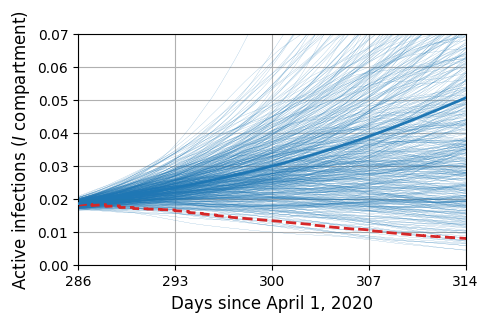

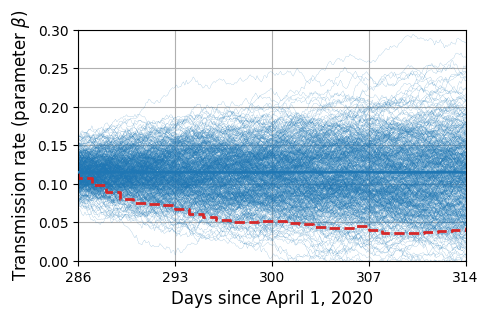

In [4]:
Ndays = 36
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(0,Ndays,tgrd) # Define time axis

gamma = 1/14
Nsamp = 500*skip

i, b = np.zeros((Nsamp,tgrd)), np.zeros((Nsamp,tgrd))
Yforecast = np.zeros((4,tgrd))

samp = np.random.multivariate_normal(xold_mean[:,3146], np.reshape(xold_var[:,3146],[4,4]), size=Nsamp)

np.random.seed(123)
for ii in range(Nsamp):
  Yforecast[:,0] = samp[ii]
  for kk in range(1,tgrd):
    Yforecast[0,kk] = Yforecast[0,kk-1] + dt*(-Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1])
    Yforecast[1,kk] = Yforecast[1,kk-1] + dt*(Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] - gamma*Yforecast[1,kk-1])
    Yforecast[2,kk] = Yforecast[2,kk-1] + dt*(gamma*Yforecast[1,kk-1])
    Yforecast[3,kk] = Yforecast[3,kk-1] + 8.74662076303546e-03*np.sqrt(dt)*np.random.normal(0,1)

  i[ii,:] = Yforecast[1,:]
  b[ii,:] = Yforecast[3,:]

mean_i = np.mean(i,axis=0)
mean_b = np.mean(b,axis=0)

Igrd = np.linspace(0,0.07,201)
Ipdf_0 = st.gaussian_kde(i[:,0],bw_method = 0.2)
Ipdf_7 = st.gaussian_kde(i[:,70],bw_method = 0.2)
Ipdf_14 = st.gaussian_kde(i[:,140],bw_method = 0.2)
Ipdf_21 = st.gaussian_kde(i[:,210],bw_method = 0.2)
Ipdf_28 = st.gaussian_kde(i[:,280],bw_method = 0.2)
Imax = np.max([Ipdf_0(Igrd),Ipdf_7(Igrd),Ipdf_14(Igrd),Ipdf_21(Igrd),Ipdf_28(Igrd)])

Bgrd = np.linspace(0,0.3,201)
Bpdf_0 = st.gaussian_kde(b[:,0],bw_method = 0.2)
Bpdf_7 = st.gaussian_kde(b[:,70],bw_method = 0.2)
Bpdf_14 = st.gaussian_kde(b[:,140],bw_method = 0.2)
Bpdf_21 = st.gaussian_kde(b[:,210],bw_method = 0.2)
Bpdf_28 = st.gaussian_kde(b[:,280],bw_method = 0.2)
Bmax = np.max([Bpdf_0(Bgrd),Bpdf_7(Bgrd),Bpdf_14(Bgrd),Bpdf_21(Bgrd),Ipdf_28(Bgrd)])


Yforecast[:,0] = xold_mean[:,3146]
for kk in range(1,tgrd):
  Yforecast[0,kk] = Yforecast[0,kk-1] + dt*(-Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1])
  Yforecast[1,kk] = Yforecast[1,kk-1] + dt*(Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] - gamma*Yforecast[1,kk-1])
  Yforecast[2,kk] = Yforecast[2,kk-1] + dt*(gamma*Yforecast[1,kk-1])
  Yforecast[3,kk] = Yforecast[3,kk-1]

f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(286+tlist[0,:],i[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(286+tlist[0,:],mean_i,linewidth=2,c='tab:blue',zorder=3)
# plt.plot(286+tlist[0,:],Yforecast[1,:],linewidth=2,c='tab:orange',zorder=2)
plt.plot(286+told[3146::]-286,xold_mean[1,3146::],linewidth=2,c='tab:red',linestyle='--',zorder=2)
# plt.plot(286+Ipdf_0(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+7+Ipdf_7(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+14+Ipdf_14(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+21+Ipdf_21(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+28+Ipdf_28(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(286+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks([286,293,300,307,314])
plt.xlim([286,314])
plt.ylim([0,0.07])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Active infections ($I$ compartment)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('figures/forecast_i_3.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(286+tlist[0,0:370],b[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(286+tlist[0,:],mean_b,linewidth=2,c='tab:blue',zorder=3)
plt.plot(286+told[3146::]-286,xold_mean[3,3146::],linewidth=2,c='tab:red',linestyle='--',zorder=2)
# plt.plot(286+Bpdf_0(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+7+Bpdf_7(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+14+Bpdf_14(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+21+Bpdf_21(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(286+28+Bpdf_28(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(286+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks([286,293,300,307,314])
plt.xlim([286,314])
plt.ylim([0,0.3])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('figures/forecast_beta_3.pdf',bbox_inches='tight')
